# Nikhil Ekanath Biradar
# MACHINE LEARNING INTERN
# Corizo 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [2]:
True_N = pd.read_csv("True.csv",error_bad_lines=False, engine="python")
Fake_N = pd.read_csv("Fake.csv",error_bad_lines=False, engine="python")

C:\Users\admin\AppData\Local\Temp\ipykernel_23860\1230492254.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  True_N = pd.read_csv("True.csv",error_bad_lines=False, engine="python")
C:\Users\admin\AppData\Local\Temp\ipykernel_23860\1230492254.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Fake_N = pd.read_csv("Fake.csv",error_bad_lines=False, engine="python")


In [3]:
True_N

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
True_N.head(15)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
True_N.shape

(21417, 4)

In [6]:
True_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
True_N.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
True_N.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [9]:
Fake_N

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [10]:
Fake_N.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [11]:
Fake_N.shape

(23481, 4)

In [12]:
Fake_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [13]:
Fake_N.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
Fake_N.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [15]:
True_N['Target']=['True']*len(True_N)
Fake_N['Target']=['Fake']*len(Fake_N)

In [16]:
data=True_N.append(Fake_N).sample(frac=1).reset_index().drop(columns=['index'])

C:\Users\admin\AppData\Local\Temp\ipykernel_23860\1196658042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=True_N.append(Fake_N).sample(frac=1).reset_index().drop(columns=['index'])


In [17]:
data

,title,text,subject,date,Target
0,U.S. hopes to pressure Myanmar to permit Rohin...,WASHINGTON (Reuters) - The United States hopes...,politicsNews,"November 22, 2017",True
1,"In Syria, Russia securing position as Assad pr...",BEIRUT (Reuters) - With the map of Syria s con...,worldnews,"December 15, 2017",True
2,BAN THE BURQA! Women Wearing A Burqa In Switze...,Do you agree with Switzerland s decision? Shou...,Government News,"Jan 29, 2016",Fake
3,BREAKING BOMBSHELL! Julian Assange Claims Murd...,Seth Rich was hired by the Democrat Party as t...,politics,"Aug 9, 2016",Fake
4,OBAMA HID BIN LADEN PAPERS To Bury This Damnin...,The Obama administration s well guarded Osama ...,politics,"Nov 4, 2017",Fake
...,...,...,...,...,...
44893,"Jared Kushner details Russia contacts, denies ...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"July 24, 2017",True
44894,Columbine Shooter Dylan Klebold’s Mother Brea...,Columbine was the original school shooting. Su...,News,"February 13, 2016",Fake
44895,Exclusive: From Russia with fuel - North Korea...,MOSCOW (Reuters) - At least eight North Korean...,worldnews,"September 20, 2017",True
44896,IVANA TRUMP SPEAKS OUT AGAINST LEFTIST RAG’S F...,Hmmm Ever wonder why the left fears Trump so m...,politics,"Jul 28, 2015",Fake


In [18]:
data.head(10)

,title,text,subject,date,Target
0,U.S. hopes to pressure Myanmar to permit Rohin...,WASHINGTON (Reuters) - The United States hopes...,politicsNews,"November 22, 2017",True
1,"In Syria, Russia securing position as Assad pr...",BEIRUT (Reuters) - With the map of Syria s con...,worldnews,"December 15, 2017",True
2,BAN THE BURQA! Women Wearing A Burqa In Switze...,Do you agree with Switzerland s decision? Shou...,Government News,"Jan 29, 2016",Fake
3,BREAKING BOMBSHELL! Julian Assange Claims Murd...,Seth Rich was hired by the Democrat Party as t...,politics,"Aug 9, 2016",Fake
4,OBAMA HID BIN LADEN PAPERS To Bury This Damnin...,The Obama administration s well guarded Osama ...,politics,"Nov 4, 2017",Fake
5,Trump Tweets Lie About America’s Third Bigges...,Donald Trump has been tweeting all day and h...,News,"June 22, 2017",Fake
6,Elected Official In Oklahoma Calls For ‘Firin...,"John Bennet, a Republican representative from ...",News,"November 4, 2016",Fake
7,BURN! SEBASTIAN GORKA HUMILIATES MSNBC On Use ...,It s probably not the wisest decision to argue...,politics,"Aug 8, 2017",Fake
8,U.S. Taxpayers Were On The Hook For Trump’s C...,Ethics? Divestment? We ve known for awhile tha...,News,"February 3, 2017",Fake
9,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,Mike Pence tweeted about how he was looking fo...,politics,"Oct 8, 2017",Fake


In [19]:
data.shape

(44898, 5)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [21]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
Target     0
dtype: int64

In [22]:
data.describe()

,title,text,subject,date,Target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [23]:
fake_target=pd.get_dummies(data.Target)["Fake"]

In [24]:
label_size = [fake_target.sum(),len(fake_target)-fake_target.sum()]

([<matplotlib.patches.Wedge at 0x1655ac184c0>,
 [Text(-1.1968727067385088, -0.0865778485782335, 'Fake'),
  Text(1.1968726986325005, 0.08657796063754254, 'True')],
 [Text(-0.6981757455974634, -0.05050374500396954, '52.3%'),
  Text(0.6981757408689586, 0.05050381037189981, '47.7%')])

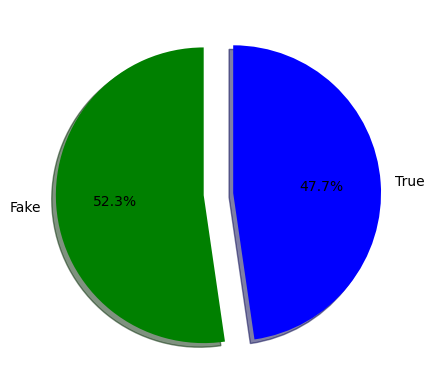

In [25]:
plt.pie(label_size,explode=[0.1,0.1],colors=['green', 'blue'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [26]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder

In [27]:
data.title

0        U.S. hopes to pressure Myanmar to permit Rohin...
1        In Syria, Russia securing position as Assad pr...
2        BAN THE BURQA! Women Wearing A Burqa In Switze...
3        BREAKING BOMBSHELL! Julian Assange Claims Murd...
4        OBAMA HID BIN LADEN PAPERS To Bury This Damnin...
                               ...                        
44893    Jared Kushner details Russia contacts, denies ...
44894     Columbine Shooter Dylan Klebold’s Mother Brea...
44895    Exclusive: From Russia with fuel - North Korea...
44896    IVANA TRUMP SPEAKS OUT AGAINST LEFTIST RAG’S F...
44897    Senate presses ex-Trump aide's son for documen...
Name: title, Length: 44898, dtype: object

In [28]:
data.text

0        WASHINGTON (Reuters) - The United States hopes...
1        BEIRUT (Reuters) - With the map of Syria s con...
2        Do you agree with Switzerland s decision? Shou...
3        Seth Rich was hired by the Democrat Party as t...
4        The Obama administration s well guarded Osama ...
                               ...                        
44893    WASHINGTON (Reuters) - President Donald Trump’...
44894    Columbine was the original school shooting. Su...
44895    MOSCOW (Reuters) - At least eight North Korean...
44896    Hmmm Ever wonder why the left fears Trump so m...
44897    (Reuters) - The U.S. Senate Intelligence Commi...
Name: text, Length: 44898, dtype: object

In [29]:
data.Target

0        True
1        True
2        Fake
3        Fake
4        Fake
         ... 
44893    True
44894    Fake
44895    True
44896    Fake
44897    True
Name: Target, Length: 44898, dtype: object

In [30]:
data['Target'].value_counts()

Fake    23481
True    21417
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

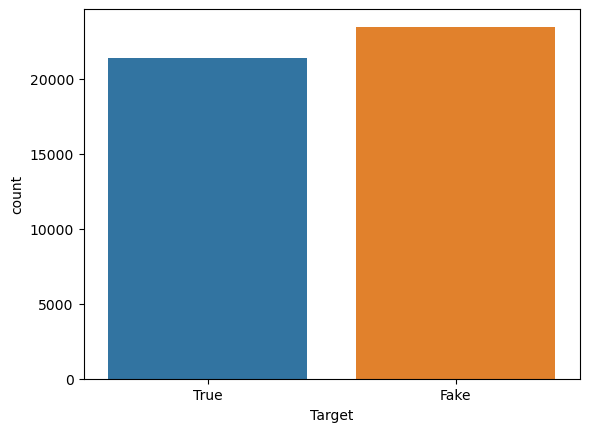

In [31]:
sns.countplot(data=data,x='Target')

In [32]:
labels=data.Target
labels.head(10)

0    True
1    True
2    Fake
3    Fake
4    Fake
5    Fake
6    Fake
7    Fake
8    Fake
9    Fake
Name: Target, dtype: object

## training and testing

In [33]:
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.3, random_state=14278)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31428,), (13470,), (31428,), (13470,))

In [35]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [36]:
LR= LogisticRegression(max_iter=1000)
LR.fit(tfidf_train,y_train)
y_pred=LR.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.57%


## Logistic Regression

In [37]:
confusion_matrix(y_test,y_pred, labels=['FAKE','True'])

array([[   0,    0],
       [   0, 6320]], dtype=int64)

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7049
        True       0.99      0.98      0.98      6421

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


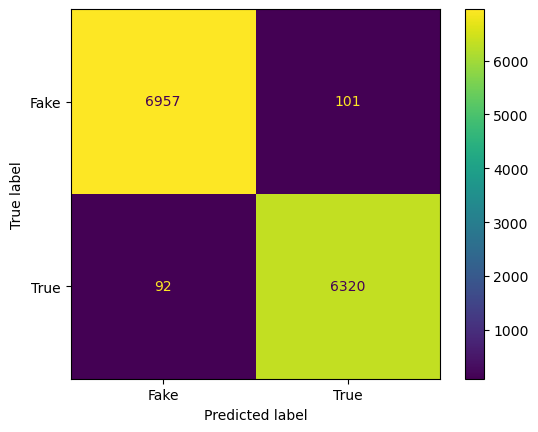

In [38]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(LR,tfidf_test,y_test)